<a href="https://colab.research.google.com/github/microprediction/microprediction/blob/master/Nearest_Least_Squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Just playing around with some sample generators. The basic idea here is to look at selections of points that minimize squared error between the nearest sample point and the data. 

See the Julia examples for using this error when training a neural network to fit a distribution. Here we are just playing and lazily using gradient free optimization. 



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from shgo import shgo

In [ ]:
# Some electricity data
data = {"prediction_run_time":"2020-11-09T19:35:42.251","delay":3555,"write_key":"7e5d0f66b23def57c5f9bcee73ab45dd","points":[16873.095723251146,16122.700430152867,14735.044320905716,17217.56879766654,18789.689124466055,16465.685102056217,17504.116050318855,17429.524676025478,16397.378127427524,15064.111009141026,17273.92279800837,16291.141359609399,16717.88613723543,17238.886614923456,16225.302432007995,15372.633368020264,16610.227879501334,15951.904887189388,15840.396712832538,16025.520700470872,13831.850293927117,18037.195048484366,15817.623376465048,16754.69288946805,17163.98964984755,17203.328639367963,17047.8825202973,16122.673310177015,15908.691910775402,17800.061425632048,15150.081677190152,16750.739661933472,15818.865175003535,15757.544462946968,17069.977547129,16844.898736312767,16355.675806034356,17053.79650140998,17045.619604701078,15758.758417850782,14563.985021531604,16716.29233036997,15140.388370649798,15829.299508177577,17526.38337687007,14919.723017148934,16848.92286518192,14379.441683948038,16576.442984361962,15315.002144317612,15257.838748813389,16156.263037116601,15158.836846217691,16914.89284394999,16141.841722892928,14718.491969291139,16461.727226736704,17680.848834857148,17109.203576953303,17800.94222179821,16146.189465095278,15680.923535797483,16102.134391032136,15959.450443266047,18432.783901628845,16626.123260900386,18205.453443618044,17996.971058684634,17376.86491950982,18453.79261318895,16888.830374856847,16421.792592778434,15600.189952182955,17092.802194352964,16067.578097126016,16437.569173520882,16193.128009424447,16629.665071164705,16803.643756681373,15546.553463017312,17319.76293162563,15220.019098219655,15198.377426409937,17563.331673322275,16774.551517630367,15679.996218707054,16457.094496490787,15302.40345098691,14635.144530011683,16076.250458908355,17398.9883413353,19738.628726975847,15757.567068670169,19838.6968202359,17732.80209360291,17950.71147863019,16811.24817034222,16222.233774003435,15820.369765074225,14474.616603013646,18358.18928810074,16908.59677097931,18200.502238878064,19447.12627223006,19014.44831930259,19943.19949475694,17009.707691061758,13674.563807092367,16806.494765680243,15646.92831869799,15260.166173424594,17556.71832764808,16171.583342356815,16477.960733412827,16466.659586194863,17008.88440854197,18153.207068589447,16986.37179611005,15776.906195948177,16471.72737323256,15440.780663883896,16352.134340369475,16333.263920018462,16501.652806344715,17318.526026399177,15929.102190949692,17646.78407759086,17520.64738136765,15232.041207768973,16588.450659502276,16408.309364377663,17414.23135292134,16272.1819809132,16988.83619899827,17522.296909962395,16602.697227350414,16065.116795632744,16433.192700340303,18093.143386366573,15041.838444678333,15766.705639033573,15433.346482345933,15611.634375232683,16320.292680234226,18578.805019282387,17117.086633720544,16653.592255678857,17316.142914518623,14692.448797766583,17973.5790974042,20563.19839458633,16831.610361664792,16956.117033621504,17362.83193439399,16496.500127235216,15438.667235524326,13328.362945549625,16324.425254546846,15411.243943246456,17162.774178706204,16774.76423886408,16758.281634175964,16568.55527980978,16929.30133907453,18648.656428291906,16716.73236662364,15818.949946465536,15263.560891418363,16995.32483413548,16041.95192538263,16392.54880750913,16366.65153938706,17234.938401310716,16277.819162526483,13667.277596553524,15269.138577938498,17128.597909061446,18489.36768087662,15063.305197812799,17180.003874978138,17109.156091150606,14819.78683655414,16279.58249508597,16929.755176535735,18836.172556316094,16187.017055272414,16463.22547617772,16267.17477876438,17206.650095520996,15617.82007300304,17407.281264675326,17195.10477375552,15427.686712239421,16639.532107512245,16143.090516800028,17056.69554757065,16405.147518069803,12302.99490913699,15272.821656742846,16980.62349840765,15604.559404149964,15703.456962035523,17822.088221774826,17851.11590012093,17169.386835181518,17781.99035536978,15400.204631297252,16128.102267579265,13263.421113667846,16972.209069305423,17261.65581609768,15517.490359848875,16254.6902684578,19168.56945353019,16349.163152316247,17138.611899839758,14503.980059053141,18038.16778378086,15578.250339698252,18280.082103570723,16808.67626965899,15249.872436821675,16140.304430335475,15907.959981566904,15420.925602325771],"stream_name":"electricity-load-nyiso-overall.json","save_filename_prefix":"demand-points-electricity-load-nyiso-overall.json","time":1604950575}


(array([ 1.,  5.,  8., 32., 59., 70., 30., 13.,  3.,  4.]),
 array([12302.99490914, 13129.01525768, 13955.03560623, 14781.05595477,
        15607.07630332, 16433.09665186, 17259.11700041, 18085.13734895,
        18911.1576975 , 19737.17804604, 20563.19839459]),
 <a list of 10 Patch objects>)

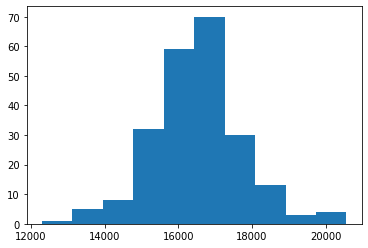

In [70]:
xs = data['points']
plt.hist(xs)

In [ ]:
!pip install shgo

In [44]:
# Method 1: Optimize over differences between points
def objective(ds):
    samples = list(np.cumsum(ds)) 
    return np.sum([ np.min( [ (x-s)*(x-s) for s in samples] ) for x in xs ])
objective(ds=[15000,1000])   

333798249.8164526

In [47]:
bounds = np.array([[10000, 20000], ] + [[0, 300], ]* 9)
res = shgo(objective, bounds, n=1500, iters=20)

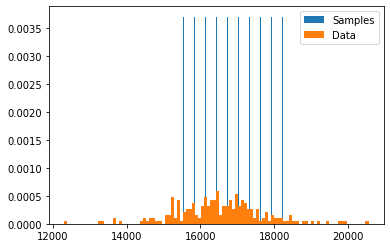

In [60]:
samples = [ res.x[0] ] + [ res.x[0]+x for x in list(np.cumsum(res.x[1:])) ]
_ = plt.hist(samples,density=True,bins=100)
_ = plt.hist(xs,density=True,bins=100)
plt.legend(['Samples','Data'])

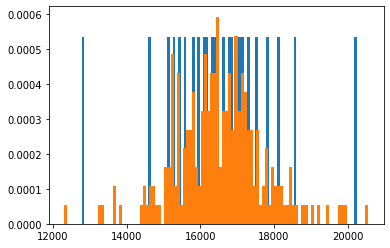

In [59]:
# Method 2: Optimize near the empirical CDF
q = np.linspace(1/450,1-1/450,25)
initial_samples = np.quantile(xs,q)
_ = plt.hist(initial_samples,density=True,bins=100)
_ = plt.hist(xs,density=True,bins=100)

In [57]:
def qobjective(xs):
    return np.sum([ np.min( [ (x-s)*(x-s) for s in samples] ) for x in xs ])



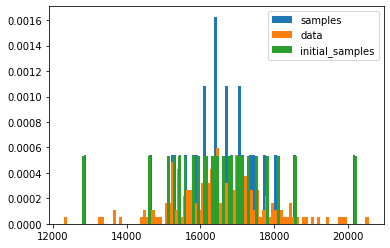

In [69]:
qbounds = [ (s-50,s+50) for s in initial_samples]
res = shgo(qobjective, qbounds, n=500, iters=20)
_ = plt.hist(res.x,density=True,bins=100)
_ = plt.hist(xs,density=True,bins=100)
_ = plt.hist(initial_samples,density=True,bins=100)
plt.legend(['samples','data','initial_samples'])

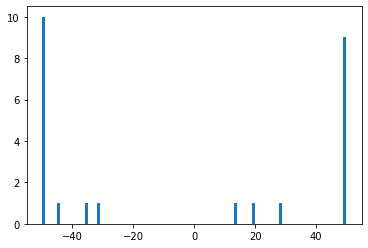

In [73]:
# How much are they moved around? 
_ = plt.hist([ s-x for s,x in zip(res.x,initial_samples)],bins=100)